In [20]:
# 该脚本用于处理轻化工整理得到的mol文件，并加氢
# MOL文件总计3819个，但是编号并不连续
import os
path = r'C:\Users\Edificehx\Desktop\workplace\MOL' 
#MOL文件路径

file_paths= []
title=[]
def load(path):
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        if os.path.splitext(file)[1]=='.mol':             #判断文件类型
              file_paths.append(os.path.join(file_path))   #文件所在目录
              title.append(os.path.splitext(file)[0])      #文件名称

load(path)  #调用定义函数
# print(file_paths)
print(len(file_paths))
print(file_paths[0])
# print(title)


3818
C:\Users\Edificehx\Desktop\workplace\MOL\entry1.mol


In [21]:
from rdkit import Chem

# mol结构转3D，包括加氢，MMFF力场优化
m3d_mol = []
id = 0
for i in file_paths: 
    m = Chem.MolFromMolFile(i)
    m3d = Chem.AddHs(m)
    AllChem.EmbedMolecule(m3d, randomSeed=3)
    AllChem.MMFFOptimizeMolecule(m3d)
#     增加name属性
    m3d.SetProp("_Name",'id_%s' %(id))
    id = id +1
    print(id)
    m3d_mol.append(m3d)

print("done")
print("--------------------------")


1
2


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(class RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, class boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

In [ ]:
# 输出mol文件，
for n in range(len(m3d_mol)):
    m3d_e = m3d_mol[n]
    filename = "id" + str(n)
    Chem.MolToMolFile(m3d_e, './mol_convert/' + filename + '.mol')

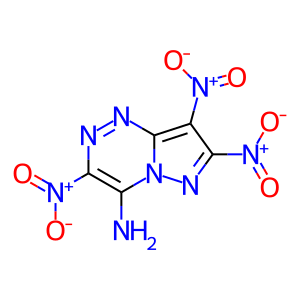

In [15]:
# 显示2D结构图
from rdkit.Chem import AllChem, Draw
# Draw.ShowMol(m, size=(150,150), kekulize=False)
Draw.MolToImage(m)